## Série Temporal

In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Lendo a base de dados
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [ ]:
#Exibindo as 5 últimas linhas
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [ ]:
#Exibindo os dados
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151,85031
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094,84600
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574,86768
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723,86318
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176,85381


### Desafio 01: Transformar os dados em uma série temporal Ano-Mês

In [ ]:
#Deletando a coluna e a linha "Total"
dados.drop("Total", axis = 1, inplace=True)
dados.drop(19, inplace=True)

#O inplace faz a troca nos dados originais
#Por padrão, o drop deleta a linha, então não preciso passar o axis

In [ ]:
#Exibindo os dados
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [ ]:
#Usando o método melt
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [ ]:
#Criando a coluna "Data"
dados_st["Data"] = dados_st[["Ano Diagnóstico", "Mês"]].agg("-".join, axis=1)

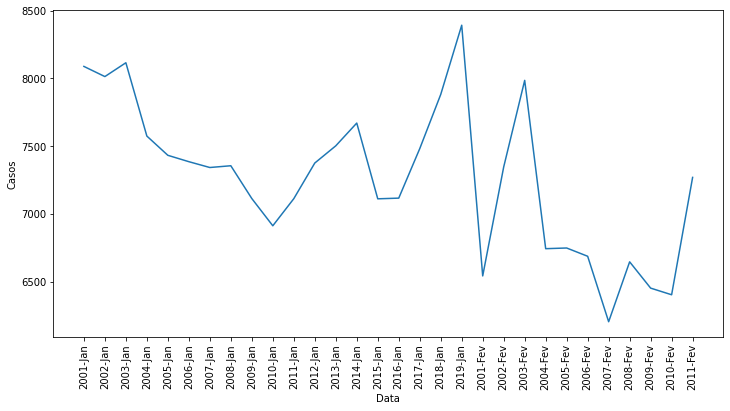

In [ ]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])

#Formatando o gráfico
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


### Desafio 02: Converter a data (String) em Datatime


In [ ]:
#Transformando a string em data
from datetime import date

#Criando um dicionário dos meses
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

dados_st["Data"] = dados_st["Data"].map(para_dia) #Mapear cada um dos valores do índice de acordo com a função "para_dia"
dados_st["Data"]

0      2001-01-01
1      2002-01-01
2      2003-01-01
3      2004-01-01
4      2005-01-01
          ...    
223    2015-12-01
224    2016-12-01
225    2017-12-01
226    2018-12-01
227    2019-12-01
Name: Data, Length: 228, dtype: object

In [ ]:
#Conferindo a transformação
dados_st["Data"][1]

datetime.date(2002, 1, 1)

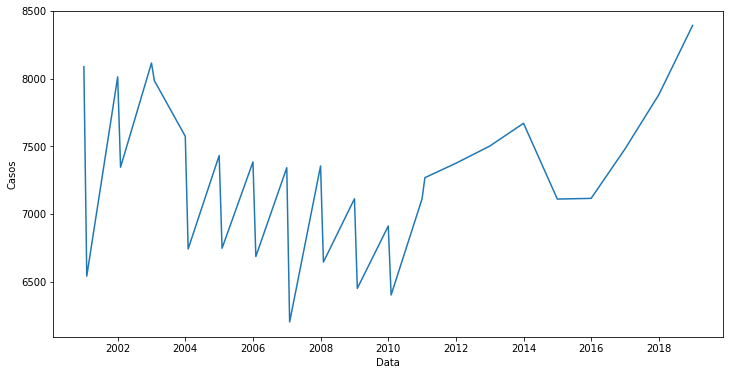

In [132]:
#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])